# Practice 7 - kNN, Decision Tree, SVM

We will work here on a data set taken from Scikit-Learn about the characteristics of malignant and benign breast tumors to prevent the risk of cancer.

## Preparation of the data set

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn 

**Loading the data set from Scikit-Learn**

In [36]:
from sklearn.datasets import load_breast_cancer
data_all = load_breast_cancer()

**Checking the keys of the dictionary loaded**

In [37]:
data_all.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

**Getting a description of the data set**

In [38]:
print(data_all.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

**Preparing the data frame of all features**

In [39]:
data_all.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [40]:
features = pd.DataFrame(data=data_all.data, columns=data_all.feature_names)
features.sample(n=8, random_state=1)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
421,14.69,13.98,98.22,656.1,0.10310,0.18360,0.14500,0.06300,0.2086,0.07406,...,16.46,18.34,114.10,809.2,0.13120,0.36350,0.3219,0.11080,0.2827,0.09208
47,13.17,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.07340,0.2128,0.06777,...,15.67,27.95,102.80,759.4,0.17860,0.41660,0.5006,0.20880,0.3900,0.11790
292,12.95,16.02,83.14,513.7,0.10050,0.07943,0.06155,0.03370,0.1730,0.06470,...,13.74,19.93,88.81,585.4,0.14830,0.20680,0.2241,0.10560,0.3380,0.09584
186,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,...,21.31,26.36,139.20,1410.0,0.12340,0.24450,0.3538,0.15710,0.3206,0.06938
414,15.13,29.81,96.71,719.5,0.08320,0.04605,0.04686,0.02739,0.1852,0.05294,...,17.26,36.91,110.10,931.4,0.11480,0.09866,0.1547,0.06575,0.3233,0.06165
132,16.16,21.54,106.20,809.8,0.10080,0.12840,0.10430,0.05613,0.2160,0.05891,...,19.47,31.68,129.70,1175.0,0.13950,0.30550,0.2992,0.13120,0.3480,0.07619
161,19.19,15.94,126.30,1157.0,0.08694,0.11850,0.11930,0.09667,0.1741,0.05176,...,22.03,17.81,146.60,1495.0,0.11240,0.20160,0.2264,0.17770,0.2443,0.06251
197,18.08,21.84,117.40,1024.0,0.07371,0.08642,0.11030,0.05778,0.1770,0.05340,...,19.76,24.70,129.10,1228.0,0.08822,0.19630,0.2535,0.09181,0.2369,0.06558


**Preparing the data frame of the target**

In [41]:
target = pd.DataFrame(data=data_all.target, columns=['tumor type'])
target.sample(n=8, random_state=1)

,tumor type
421,1
47,0
292,1
186,0
414,0
132,0
161,0
197,0


**To make the target encoding more obvious (we want to predict the risk of cancer), we invert the encoding values so that now 0 codes benign and 1 codes malignant**

In [42]:
target = target.replace({0:1, 1:0})
target.sample(n=8, random_state=1)

,tumor type
421,0
47,1
292,0
186,1
414,1
132,1
161,1
197,1


## Subject

We consider two predictors: mean radius and mean texture.
* Train a k-NN with k=5 and plot the decision areas based on that model.
* Explore different values of k to determine an optimal value.
* Train a k-NN with the optimal k you found.
* Train a Decision Tree and plot the decision areas based on that model.
* What would be an optimal value for the depth of the Decision Tree?  
*Hint*: you can use parameter max_depth of DecisionTreeClassifier.
* Train a Random Forest and plot the decision areas based on that model.  
*Bonus:* you can tune the hyperparameters of your Random Forest model (refer to the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) to see what parameters can be tuned). If you want to facilitate the optimization of many hyperparameters at once, you can use the [Grid Search method](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html). 
* Train a SVM (with linear kernel) and plot the decision areas based on that model.
* Compare the performance between all models. Choose a comparison metric and explain your choice.
* Pick the best model, explain your choice, and compute its performance on unseen test data (unseen means your model was never trained or tuned on it).

In [43]:
data_all.target_names

array(['malignant', 'benign'], dtype='<U9')

In [44]:
target = target.replace({0:data_all.target_names[1], 1:data_all.target_names[0]})
target.sample(n=8, random_state=1)

,tumor type
421,benign
47,malignant
292,benign
186,malignant
414,malignant
132,malignant
161,malignant
197,malignant


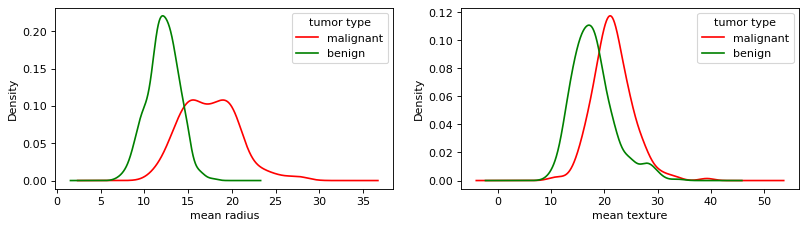

In [45]:
feature_list = ['mean radius', 'mean texture']

fig, axs = plt.subplots(1,len(feature_list), figsize=(12,3), dpi= 80)
for i_axs in range(len(feature_list)):
    for i, feature_value in enumerate(['malignant', 'benign']):
        (features[feature_list[i_axs]][target['tumor type']==feature_value]).plot(kind='density', label=feature_value, c=['red', 'green'][i], ax=axs[i_axs])
    axs[i_axs].set_xlabel(feature_list[i_axs])
    axs[i_axs].legend(title='tumor type')
plt.show() 

In [46]:
X = features[['mean radius', 'mean texture']].values

In [47]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(target['tumor type'])

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (426, 2) (426,)
Test set: (143, 2) (143,)


In [49]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Train a k-NN with k=5 and plot the decision areas based on that model.

In [50]:
from sklearn.neighbors import KNeighborsClassifier
knn = {'classifier': KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')}
knn['classifier'].fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

### Explore different values of k to determine an optimal value.

In [110]:
from sklearn.neighbors import KNeighborsClassifier
knn = {'classifier': KNeighborsClassifier(n_neighbors = 15, metric = 'euclidean')}
knn1['classifier'].fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=100)

Minimum error:- 0.08391608391608392 at K = 27


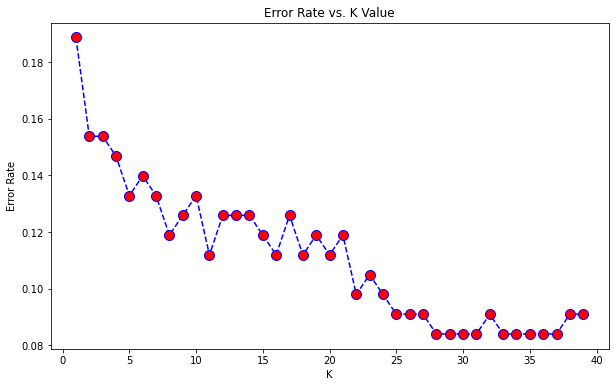

In [111]:
error_rate = []
for i in range(1,40):
 knn1 = KNeighborsClassifier(n_neighbors=i)
 knn1.fit(X_train,y_train)
 pred_i = knn1.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

### Train a k-NN with the optimal k you found.

In [112]:
knn = {'classifier': KNeighborsClassifier(n_neighbors = 27, metric = 'euclidean')}
knn['classifier'].fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=27)

### Train a Decision Tree and plot the decision areas based on that model.

In [113]:
from sklearn.tree import DecisionTreeClassifier
# dt = {'classifier': DecisionTreeClassifier(criterion = 'entropy', random_state = 0)}
dt = {'classifier': DecisionTreeClassifier(criterion = 'entropy', random_state = 0, max_depth = 4)}
dt['classifier'].fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)

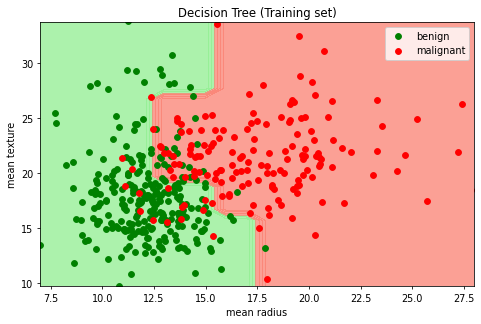

In [114]:
from matplotlib.colors import ListedColormap
fig = plt.figure(figsize=(8,5), dpi= 70)
X_set, y_set = sc.inverse_transform(X_train), label_encoder.inverse_transform(y_train)
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min(), stop = X_set[:, 0].max()),
                     np.arange(start = X_set[:, 1].min(), stop = X_set[:, 1].max()))
plt.contourf(X1, X2, dt['classifier'].predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('lightgreen', 'salmon')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], color = ListedColormap(('green', 'red'))(i), label = j)
plt.title('Decision Tree (Training set)')
plt.xlabel('mean radius')
plt.ylabel('mean texture')
plt.legend()
plt.show()

### What would be an optimal value for the depth of the Decision Tree?

Minimum error:- 0.1048951048951049 at K = 2


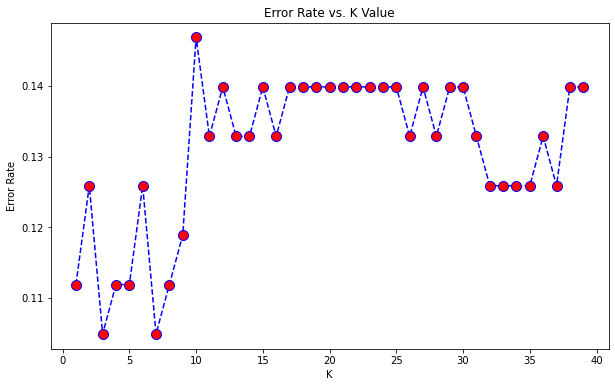

In [158]:
error_rate = []
for i in range(1,40):
 dt = DecisionTreeClassifier(max_depth=i)
 dt.fit(X_train,y_train)
 pred_i = dt.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

An optimal value for the depth of the Decision Tree is 2.

### Train a Random Forest and plot the decision areas based on that model.

In [116]:
from sklearn.ensemble import RandomForestClassifier
rf = {'classifier': RandomForestClassifier(n_estimators= 10, criterion = 'entropy')}
rf['classifier'].fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

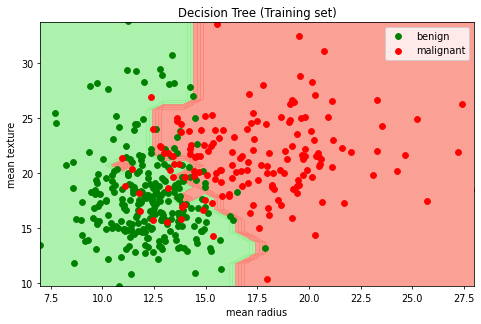

In [117]:
from matplotlib.colors import ListedColormap
fig = plt.figure(figsize=(8,5), dpi= 70)
X_set, y_set = sc.inverse_transform(X_train), label_encoder.inverse_transform(y_train)
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min(), stop = X_set[:, 0].max()),
                     np.arange(start = X_set[:, 1].min(), stop = X_set[:, 1].max()))
plt.contourf(X1, X2, rf['classifier'].predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('lightgreen', 'salmon')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], color = ListedColormap(('green', 'red'))(i), label = j)
plt.title('Decision Tree (Training set)')
plt.xlabel('mean radius')
plt.ylabel('mean texture')
plt.legend()
plt.show()

### Bonus:* you can tune the hyperparameters of your Random Forest model (refer to the documentation to see what parameters can be tuned). If you want to facilitate the optimization of many hyperparameters at once, you can use the Grid Search method.

In [170]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
iris = datasets.load_iris()
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(iris.data, iris.target)
sorted(clf.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_C',
 'param_kernel',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [168]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 0, stop = 100, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [169]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [0, 11, 22, 33, 44, 55, 66, 77, 88, 100]}


### Train a SVM (with linear kernel) and plot the decision areas based on that model.

In [118]:
from sklearn.svm import SVC
svm = {'classifier': SVC(kernel = 'linear', random_state = 0, probability = True)}
# svm = {'classifier': SVC(kernel = 'rbf', random_state = 0, probability = True)}
svm['classifier'].fit(X_train, y_train)

SVC(kernel='linear', probability=True, random_state=0)

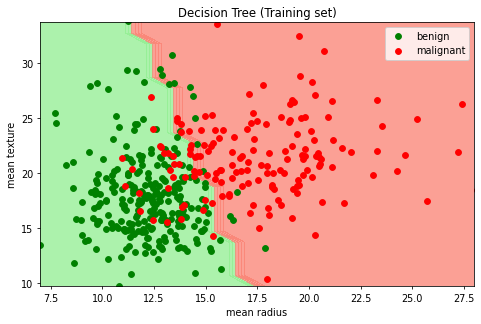

In [119]:
from matplotlib.colors import ListedColormap
fig = plt.figure(figsize=(8,5), dpi= 70)
X_set, y_set = sc.inverse_transform(X_train), label_encoder.inverse_transform(y_train)
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min(), stop = X_set[:, 0].max()),
                     np.arange(start = X_set[:, 1].min(), stop = X_set[:, 1].max()))
plt.contourf(X1, X2, svm['classifier'].predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('lightgreen', 'salmon')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], color = ListedColormap(('green', 'red'))(i), label = j)
plt.title('Decision Tree (Training set)')
plt.xlabel('mean radius')
plt.ylabel('mean texture')
plt.legend()
plt.show()

### Compare the performance between all models. Choose a comparison metric and explain your choice

#### Making predictions

In [131]:
knn['y_proba'] = knn['classifier'].predict_proba(X_test)
knn['y_proba'][:10]

array([[0.62962963, 0.37037037],
       [0.48148148, 0.51851852],
       [0.88888889, 0.11111111],
       [0.81481481, 0.18518519],
       [0.96296296, 0.03703704],
       [0.92592593, 0.07407407],
       [0.77777778, 0.22222222],
       [0.92592593, 0.07407407],
       [0.88888889, 0.11111111],
       [1.        , 0.        ]])

In [132]:
dt['y_proba'] = dt['classifier'].predict_proba(X_test)
dt['y_proba'][:10]

array([[0.40384615, 0.59615385],
       [0.40384615, 0.59615385],
       [0.89320388, 0.10679612],
       [0.89320388, 0.10679612],
       [0.89320388, 0.10679612],
       [0.89320388, 0.10679612],
       [1.        , 0.        ],
       [0.89320388, 0.10679612],
       [1.        , 0.        ],
       [1.        , 0.        ]])

In [133]:
rf['y_proba'] = rf['classifier'].predict_proba(X_test)
rf['y_proba'][:10]

array([[0.6, 0.4],
       [0.5, 0.5],
       [0.8, 0.2],
       [0.7, 0.3],
       [1. , 0. ],
       [0.9, 0.1],
       [0.9, 0.1],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ]])

In [134]:
svm['y_proba'] = svm['classifier'].predict_proba(X_test)
svm['y_proba'][:10]

array([[0.74253998, 0.25746002],
       [0.56199099, 0.43800901],
       [0.81795624, 0.18204376],
       [0.68163315, 0.31836685],
       [0.86225378, 0.13774622],
       [0.9647726 , 0.0352274 ],
       [0.86252468, 0.13747532],
       [0.94607599, 0.05392401],
       [0.99455051, 0.00544949],
       [0.99413477, 0.00586523]])

In [146]:
model_list = [knn, dt, rf, svm]
for model in model_list:
    model['y_proba_positive'] = model['y_proba'][:,1]

In [147]:
knn['y_pred'] = knn['classifier'].predict(X_test)

In [148]:
dt['y_pred'] = dt['classifier'].predict(X_test)

In [149]:
rf['y_pred'] = rf['classifier'].predict(X_test)

In [150]:
svm['y_pred'] = svm['classifier'].predict(X_test)

In [151]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def compute_metrics(classifier_data, y_test):
    model_name = classifier_data['classifier'].__class__.__name__
    
    accuracy = round(accuracy_score(y_test, classifier_data['y_pred']), 2)
    precision = round(precision_score(y_test, classifier_data['y_pred']),2)
    recall = round(recall_score(y_test, classifier_data['y_pred']),2)
    f1 = round(f1_score(y_test, classifier_data['y_pred']), 2)
    auc = round(roc_auc_score(y_test, classifier_data['y_proba_positive']), 2)
    
    print('Model: ' + model_name)
    print('-' * 80)
    print('Accuracy (proportion of correct predictions) is ' + str(accuracy))
    print('Precision (proportion of true purchases among purchase predictions) is ' + str(precision))
    print('Recall (proportion of true purchases that are correctly predicted) is ' + str(recall))
    print('F1 score (combination of precision and recall) is ' + str(f1))
    print('Area Under the Curve (AUC) is ' + str(auc))
    return pd.DataFrame({
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 score': f1,
        'AUC score': auc
    }, index=[model_name])

In [152]:
knn['metrics'] = compute_metrics(knn, y_test)

Model: KNeighborsClassifier
--------------------------------------------------------------------------------
Accuracy (proportion of correct predictions) is 0.91
Precision (proportion of true purchases among purchase predictions) is 0.87
Recall (proportion of true purchases that are correctly predicted) is 0.89
F1 score (combination of precision and recall) is 0.88
Area Under the Curve (AUC) is 0.96


In [153]:
dt['metrics'] = compute_metrics(dt, y_test)

Model: DecisionTreeClassifier
--------------------------------------------------------------------------------
Accuracy (proportion of correct predictions) is 0.87
Precision (proportion of true purchases among purchase predictions) is 0.79
Recall (proportion of true purchases that are correctly predicted) is 0.87
F1 score (combination of precision and recall) is 0.83
Area Under the Curve (AUC) is 0.92


In [154]:
rf['metrics'] = compute_metrics(rf, y_test)

Model: RandomForestClassifier
--------------------------------------------------------------------------------
Accuracy (proportion of correct predictions) is 0.87
Precision (proportion of true purchases among purchase predictions) is 0.84
Recall (proportion of true purchases that are correctly predicted) is 0.79
F1 score (combination of precision and recall) is 0.82
Area Under the Curve (AUC) is 0.94


In [155]:
svm['metrics'] = compute_metrics(svm, y_test)

Model: SVC
--------------------------------------------------------------------------------
Accuracy (proportion of correct predictions) is 0.9
Precision (proportion of true purchases among purchase predictions) is 0.87
Recall (proportion of true purchases that are correctly predicted) is 0.87
F1 score (combination of precision and recall) is 0.87
Area Under the Curve (AUC) is 0.96


In [156]:
pd.concat([model['metrics'] for model in model_list])

,Accuracy,Precision,Recall,F1 score,AUC score
KNeighborsClassifier,0.91,0.87,0.89,0.88,0.96
DecisionTreeClassifier,0.87,0.79,0.87,0.83,0.92
RandomForestClassifier,0.87,0.84,0.79,0.82,0.94
SVC,0.90,0.87,0.87,0.87,0.96


### Pick the best model, explain your choice, and compute its performance on unseen test data (unseen means your model was never trained or tuned on it).

I choose KNN model because it has the higest recall value.